In [ ]:
## Ensemble modeling is a process where two or more models are generated and then their results are combined
## Random Forest, many decision trees are created during 
## training time on randomly selected features.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\data\\census.csv")

In [3]:
data.count(0)

age                 32560
workclass           30724
education           32560
education_num       32560
marital_status      32560
occupation          30717
relationship        32560
race                32560
gender              32560
hours_per_week      32560
native_country      31977
greater_than_50k    32560
dtype: int64

In [4]:
data.count(0)/data.shape[0]*100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

In [5]:
## remove the rows that have empty values and also remove the education_num as it contains same info
data = data.dropna(how='any')
del data['education_num']

In [6]:
data.count(0)

age                 30161
workclass           30161
education           30161
marital_status      30161
occupation          30161
relationship        30161
race                30161
gender              30161
hours_per_week      30161
native_country      30161
greater_than_50k    30161
dtype: int64

Text(0, 0.5, 'Frequency')

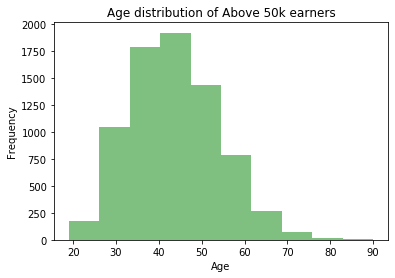

In [8]:
## Exploring the census data
#hypothesis 1: People who are older earn more
hist_above_50 = plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Age distribution of Above 50k earners')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

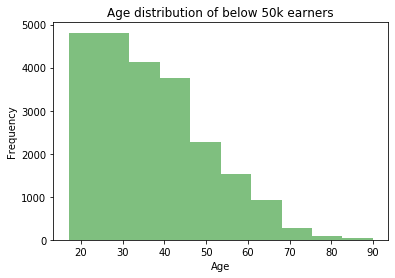

In [9]:
## plot histogram of the ade of the people who earn less than $50K a year
hist_below_50 = plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Age distribution of below 50k earners')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [10]:
## Hypothesis 2: Income bias based on working class
dist_data = pd.concat([data[data.greater_than_50k==1].groupby('workclass').workclass.count(), data[data.greater_than_50k==0].groupby('workclass').workclass.count()], axis=1)
dist_data.columns = ['wk_class_gt50', 'wk_class_lt50']

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [11]:
dist_data_final = dist_data.wk_class_gt50 / (dist_data.wk_class_lt50 + dist_data.wk_class_gt50)

In [12]:
dist_data_final.sort(ascending=False)

AttributeError: 'Series' object has no attribute 'sort'